<a href="https://colab.research.google.com/github/Tuna10001/Assignments-on-remote-sensing-and-water-quality-data-analysis/blob/main/Water_quality_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module: Water Quality Assesment and Monitoring**

## Task: Data analysis individual assignment

## Student Name: Isaq M. Tuna

## Student ID: 1087936

## **Introduction**

The assignment involves analysing water quality datasets from Delftland collected over a period of 5 years (January 2010 - December 2015). The variable assigned for this task is Phosphate (PO₄) and the objective is to perform the following tasks;


*   Investigate how PO₄ variable changed over in the different land use types;
produce one suitable graph with caption.


*   Compare PO₄ concentrations among locations with different land use; perform a statistical analysis and produce one suitable graph with caption.

*   Relate PO₄ concentration to another Nitrate-Nitrite(NO3-NO2) In the dataset
using correlation or regression analysis and produce one graph with caption.


**Lets load in the datasets from Delftland data and print the headers.**

In [ ]:
# Dataset loading
from google.colab import files
uploaded = files.upload()
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd



**Data handling**

In [ ]:
#Datasets headers
import os
file_path = '/content/Delfland_data.xlsx'
df = pd.read_excel(file_path)
df.head()

,Loc_code,Location,Landuse,Xcoor,Ycoor,Date,Year,Month,Monthno,Time,NH4,Nkjel,Ntot,DO,PO4,Ptot,NO3NO2,Temp,Sec,Cond
0,OW090-000,"Brielsemeer, inlaat gemaal Winsemius",opw,69720,438545,2010-01-05,2010,Jan,1,NaN,0.13,0.4,3.6,13.20,0.10,0.11,3.3,1.75,4.2,NaN
1,OW056-000,"Groote Gantel, Zwartendijk",grh,73263,447701,2010-01-04,2010,Jan,1,NaN,0.90,1.6,5.8,9.94,1.20,1.42,4.2,1.11,1.3,NaN
2,OW044-000,"Haagsche Vliet, Wiekstraat",urb,82924,453538,2010-01-11,2010,Jan,1,NaN,0.70,1.6,2.7,9.58,0.64,0.67,1.0,0.94,0.6,NaN
3,OW080-002,"Heen- & Geestvaart, Alsemgeestlaan",grh,70874,445554,2010-01-04,2010,Jan,1,NaN,1.10,1.9,10.0,10.40,0.67,0.72,8.5,1.40,0.8,NaN
4,OW069-000,"Molslaan, Delft",urb,84656,447432,2010-01-12,2010,Jan,1,NaN,0.80,1.9,3.1,7.21,0.30,0.35,1.2,0.60,1.0,NaN


The dataset contains spatial data on monitoring sites, landuse, temporal data and water quality variables. Land use is categorized into greenhouses (grh), openwater (opw), urban area (urb) and rural area (rur))

### Questions (1-3)

**1. Investigate how PO₄ variable changed over in the different land use types; produce one suitable graph with caption.**

grouping the data by months, landuse and getting the mean and standard deviations for plotting a line graph

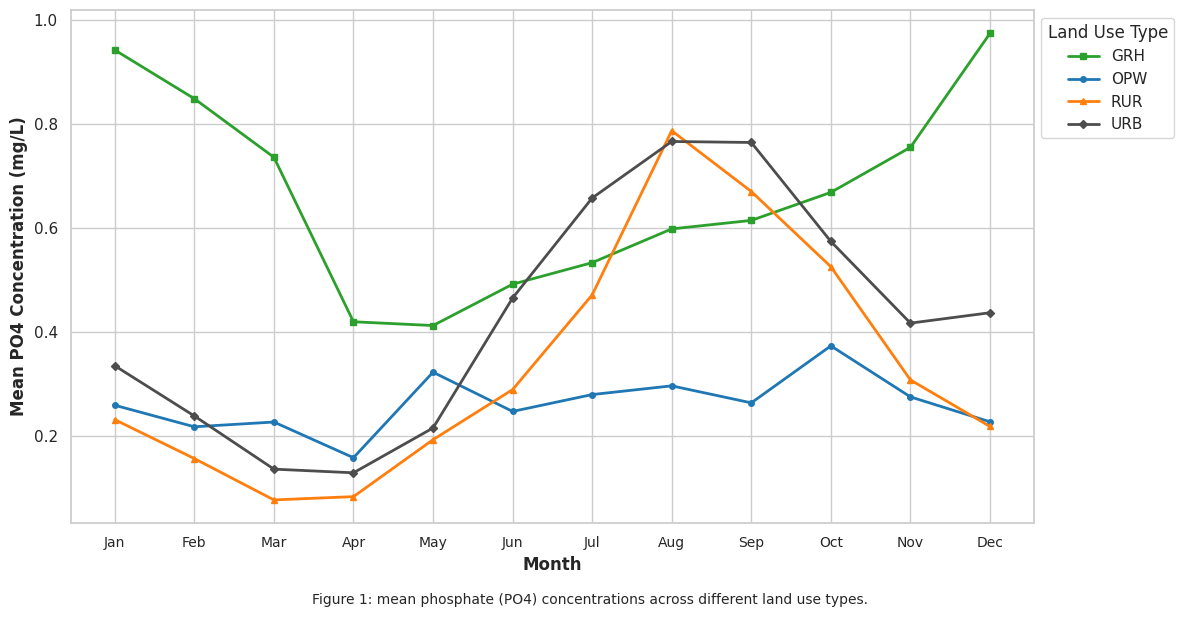

In [ ]:
df['Monthno'] = df['Monthno'].astype(int)

monthly_stats = df.groupby(['Landuse', 'Monthno'])['PO4'].agg(['mean', 'std', 'count']).reset_index()
monthly_stats['se'] = monthly_stats['std'] / (monthly_stats['count'] ** 0.5)

custom_palette = {
    'grh': '#2ca02c',
    'opw': '#1f77b4',
    'rur': '#ff7f0e',
    'urb': '#4d4d4d'
}

custom_markers = {
    'grh': 's',
    'opw': 'o',
    'rur': '^',
    'urb': 'D'
}

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

for landuse, marker in custom_markers.items():
    subset = monthly_stats[monthly_stats['Landuse'] == landuse]
    plt.plot(
        subset['Monthno'], subset['mean'],
        marker=marker, color=custom_palette[landuse],
        markersize=4, label=landuse.upper(), linewidth=2
    )


plt.xlabel('Month', fontsize=12, weight='bold')
plt.ylabel('Mean PO4 Concentration (mg/L)', fontsize=12, weight='bold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)

plt.legend(
    title='Land Use Type',
    title_fontsize=12,
    fontsize=11,
    loc='upper left',
    bbox_to_anchor=(1, 1)
)

caption = ('Figure 1: mean phosphate (PO4) concentrations across different land use types. ')
plt.figtext(0.5, -0.02, caption, wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()

plt.show()



The monthly means in fig. 1 above shows that the concentration of PO₄ across
the various landuse types with highest concetrations observed in greenhouse (with highest peak in December and lowest dip in May) and, the lowest in open water which also depicts a much more stable variation in concentration across the months unlike the other landuse types.

Increased concentrations are observed in all the landuse types from months of May through August where the concentrations start to recede  gradually to baseline levels in january. This likely depicts a seasonality effect.

The Standard deviation across the landuse is high indicating significant flactuation in concentrations within each landuse category. Greenhouses have the larges standard variation among the landuse types as shown in the descriptive statistics below for the data.

A summary statistic for PO₄ variable grouped by landuse is depicted below, with confidence intervals for the PO₄ variable.

In [ ]:
#confidence interval
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    stderr = stats.sem(data)  # Standard error of the mean
    margin = stderr * stats.t.ppf((1 + confidence) / 2., n-1)  # t-critical value
    return mean - margin, mean + margin

#Summary statistics
def calculate_summary(group):
    ci_low, ci_high = confidence_interval(group['PO4'])
    return pd.Series({
        'count': group['PO4'].count(),
        'mean': group['PO4'].mean(),
        'std': group['PO4'].std(),
        'min': group['PO4'].min(),
        'q25': group['PO4'].quantile(0.25),
        'median': group['PO4'].median(),
        'q75': group['PO4'].quantile(0.75),
        'max': group['PO4'].max(),
        'variance': group['PO4'].var(),
        'skewness': group['PO4'].skew(),
        'kurtosis': group['PO4'].kurt(),
        'ci_lower': ci_low,
        'ci_upper': ci_high
    })

summary_stats = df_no_missing_po4.groupby('Landuse').apply(calculate_summary).reset_index()

print(summary_stats)


NameError: name 'df_no_missing_po4' is not defined

**2. Comparison of PO₄ concentrations among locations with different land use; and a statistical analysis with a graphical output**

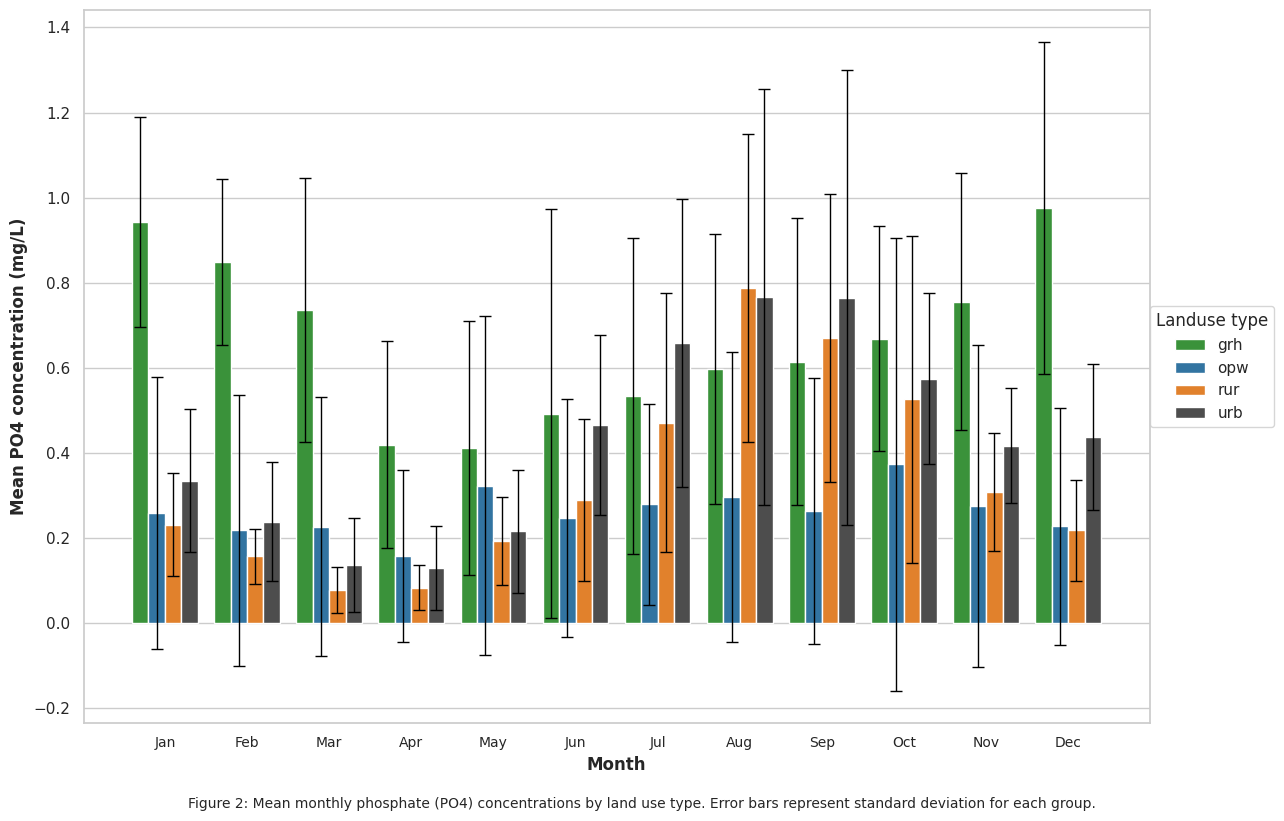

In [ ]:
df_stats = df.groupby(['Monthno', 'Landuse'])['PO4'].agg(['mean', 'std']).reset_index()

sns.set_theme(style="whitegrid")

custom_palette = {
    'grh': '#2ca02c',
    'opw': '#1f77b4',
    'rur': '#ff7f0e',
    'urb': '#4d4d4d'
}

plt.figure(figsize=(13, 8))
sns.barplot(
    data=df_stats,
    x='Monthno',
    y='mean',
    hue='Landuse',
    palette=custom_palette,
    errorbar=None,
    dodge=True
)

for i, landuse in enumerate(df_stats['Landuse'].unique()):
    subset = df_stats[df_stats['Landuse'] == landuse]
    plt.errorbar(
        x=subset['Monthno'] - 1 + (i - 1.5) * 0.2,
        y=subset['mean'],
        yerr=subset['std'],
        fmt='none',
        ecolor='black',
        capsize=4,
        elinewidth=1
    )

plt.xlabel('Month', fontsize=12, weight='bold')
plt.ylabel('Mean PO4 concentration (mg/L)', fontsize=12, weight='bold')

plt.xticks(
    range(12),
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    fontsize=10
)

plt.legend(
    title='Landuse type',
    title_fontsize=12,
    fontsize=11,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    borderaxespad=0
)

caption = ('Figure 2: Mean monthly phosphate (PO4) concentrations by land use type. '
           'Error bars represent standard deviation for each group.')
plt.figtext(0.5, -0.02, caption, wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()

plt.show()


From fig. 2 above, greenhouse areas depict higher concentrations in most of the months while the concentrations in open water body landuse types is lowest overally.

 There are variabilities observed in the monthly mean concentrations across all the land use types, likely a clear seasonality effect with concetrations in Urban and rural landuse type peak having a noticeble peaks in the months of August and September overshadowing greehouses which dominates in concentration over the other months.

Lowest concentrations of PO₄ is seen in rural land use type during the month of February-May.

We can further see the trends and magnitudes of concentrations across different landuses using the bar chart below;

In [ ]:
import altair as alt

landuse_colors = {
    'urb': 'darkgrey',
    'grh': 'green',
    'opw': 'blue',
    'rur': 'orange'
}

base = alt.Chart(df_stats).encode(
    x='Monthno:N',
    y='mean:Q',
    color=alt.Color('Landuse:N', scale=alt.Scale(domain=['urb', 'grh', 'opw', 'rur'], range=['darkgrey', 'green', 'blue', 'orange']))
).mark_bar()

error_bars = alt.Chart(df_stats).encode(
    x='Monthno:N',
    y='mean:Q',
    y2='mean:Q',
    color=alt.Color('Landuse:N', scale=alt.Scale(domain=['urb', 'grh', 'opw', 'rur'], range=['darkgrey', 'green', 'blue', 'orange'])),
    size=alt.value(2)
).transform_calculate(
    y2='datum.mean - datum.std'
).mark_rule()

chart = alt.layer(base, error_bars).properties(
    width=800,
    height=400
).configure_axis(
    labelAngle=360
).encode(
    x=alt.X('Monthno:N', title='Month'),
    y=alt.Y('mean:Q', title='Mean PO4 concentration (mg/L)')
)


chart.show()


alt.LayerChart(...)

### **2. Comparison of PO₄ among locations with different land use; perform a statistical analysis and produce one suitable graph with caption.**

For this comparison, i will utilize the one-way Anova to check for any significant differences in landuse types.

I will then test this hypothesis for the data;

Null hypothesis (H₀): The are no significant differences in the mean PO₄ concetrations between the landuse groups

Alternative hypothesis(H₁): Atleast one landuse category has a mean PO₄ concetration that is significantly different from the others.

In [ ]:
# Performing  ANOVA to test if there are significant differences in PO4 among different land uses
groups = [group['PO4'].values for name, group in df_clean.groupby('Landuse')]

anova_result = stats.f_oneway(*groups)

ssb = sum([len(group) * (group.mean() - df_clean['PO4'].mean())**2 for group in groups])
dfb = len(groups) - 1
ssw = sum([((group - group.mean())**2).sum() for group in groups])
dfw = len(df_clean) - len(groups)

msb = ssb / dfb
msw = ssw / dfw
f_statistic = msb / msw
p_value = anova_result.pvalue
f_crit = stats.f.ppf(0.95, dfb, dfw)

print(f"ANOVA Results:\n"
      f"Sum of Squares Between: {ssb:.2f}\n"
      f"Sum of Squares Within: {ssw:.2f}\n"
      f"Total Sum of Squares: {ssb + ssw:.2f}\n"
      f"Degrees of Freedom Between: {dfb}\n"
      f"Degrees of Freedom Within: {dfw}\n"
      f"Total Degrees of Freedom: {dfb + dfw}\n"
      f"Mean Squares Between: {msb:.2f}\n"
      f"Mean Squares Within: {msw:.2f}\n"
      f"F-statistic: {f_statistic:.2f}\n"
      f"P-value: {p_value:.5f}\n"
      f"Critical F (F-crit): {f_crit:.2f}")

landuse_colors = {
    'urb': 'darkgrey',
    'grh': 'green',
    'opw': 'blue',
    'rur': 'orange'
}



ANOVA Results:
Sum of Squares Between: 17.73
Sum of Squares Within: 86.16
Total Sum of Squares: 103.88
Degrees of Freedom Between: 3
Degrees of Freedom Within: 730
Total Degrees of Freedom: 733
Mean Squares Between: 5.91
Mean Squares Within: 0.12
F-statistic: 50.07
P-value: 0.00000
Critical F (F-crit): 2.62


From the result of the ANOVA, we can conclude the following about the concentration of PO4 across the landuse types;

The F-statistics (50.07) is significantly larger than the f-critical value (2.62) while p-value is much less that the alpha (0.05). We can therefore reject the null hypothesis (H₀) and conclude that atleast one landuse category has a mean PO4 concentration that is significantly different from the others.

We can further use the Tukey's HSD test to see the differences between the landuse types as below;

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_result = pairwise_tukeyhsd(endog=df_clean['PO4'], groups=df_clean['Landuse'], alpha=0.05)

print("\nTukey's HSD Test Results:")
print(tukey_result.summary())


Tukey's HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   grh    opw  -0.3817    0.0 -0.4657 -0.2976   True
   grh    rur  -0.3118    0.0 -0.4115 -0.2122   True
   grh    urb  -0.2088    0.0 -0.2979 -0.1198   True
   opw    rur   0.0698 0.2873 -0.0316  0.1712  False
   opw    urb   0.1728    0.0  0.0818  0.2639   True
   rur    urb    0.103 0.0589 -0.0026  0.2086  False
----------------------------------------------------


The result of Tukey's HSD test shows that mean PO4 concentration for greenhouses landuse types differes from all other landuse types with p-value (0) while open water landuse depicting significant difference with with urban landuse (p-value = 0) but not with rural landuse type. The rural and urban landuse categories do not show any significant differences in the PO4 concentation with P-value (0.0589) larger than alpha.

A visual respresentation of this was done using a boxplot as below;

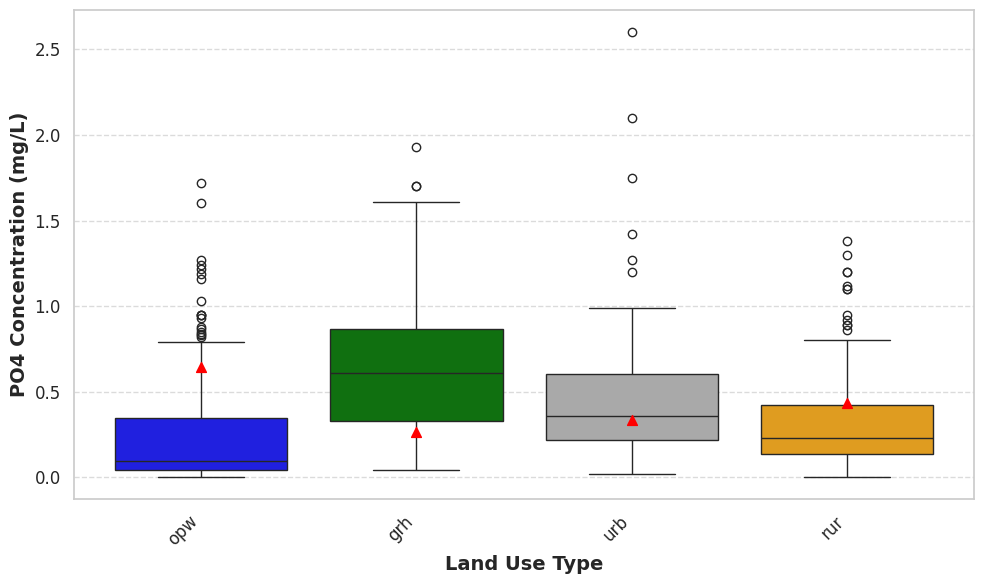

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_clean, x='Landuse', y='PO4', hue='Landuse', dodge=False, palette=landuse_colors)

means = df_clean.groupby('Landuse')['PO4'].mean()

for i, landuse in enumerate(means.index):
    ax.scatter(i, means[landuse], marker='^', color='red', s=50, label='Mean' if i == 0 else "", zorder=3)

plt.xlabel('Land Use Type', fontsize=14, weight='bold')
plt.ylabel('PO4 Concentration (mg/L)', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From the plot above, we can clearly see that the landuse types depict different mean concentrations of PO4 in the dominance as grh>urb>rur>opw. Greenhouse PO4 concentrations appear to be symetric with larger spread while the open water bodies being the least. Open water bodies show high skewness in the data than other landuse types.There are presence of outliers for all landuse types with more outliers in the open water bodies.

### **3. Relating PO4 variable to another variable in the dataset using correlation or regression analysis. Produce one graph with caption**

**Here will do both the corelation and regression to see the strength and significance of the relationship between PO4 and NO3NO2 variables**

In [ ]:
f = pd.read_excel('/content/Delfland_data.xlsx')
df_cleaned = df.dropna(subset=['PO4', 'NO3NO2'])

correlation = df_cleaned['PO4'].corr(df_cleaned['NO3NO2'])

X = df_cleaned['NO3NO2']
y = df_cleaned['PO4']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

slope = model.params.iloc[1]
intercept = model.params.iloc[0]
r_squared = model.rsquared

print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_squared:.2f}")
print(f"Pearson correlation: {correlation:.2f}")

print("\n" * 1)

plt.figure(figsize=(10, 6))
sns.regplot(x='NO3NO2', y='PO4', data=df_cleaned, scatter_kws={'alpha':0.5}, line_kws={'color': 'black'})
plt.title('Relationship between PO4 and NO3NO2')
plt.xlabel('NO3NO2 (mg/L)')
plt.ylabel('PO4  (mg/L)')
plt.text(0.1, 0.9, f'Pearson r = {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.show()

NameError: name 'pd' is not defined

The result of the linear regression suggest a that there is statistical significant relationship between the tow variables albeit very weak.

R-squared (0.073) - This means that only 7.3% of variability in PO4 concentrations can be atrributed to NO3NO2 presence. This means there is a weak relationship between this two variables and we cant therefore predict concentrations of PO4 based on NO3NO2. Therefore there are other factors that play a role in concentrations of PO4 overally that are not captured by NO3NO2 concentrations.

The slope (0.039) and the intercept (0.358) depics a weak positive linear relationship between the two variables.

This is corroborated by the Pearsons r which suggest weak positive corelation between the two variables (0.027) with a p-value extremely small (1.01e-13)
